In [30]:
import numpy as np
import pandas as pd

In [31]:
df=pd.read_csv("gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [32]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [33]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [34]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [35]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [36]:
x=df.iloc[:,:-1].values
x

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [37]:
y=df.iloc[:,-1].values
y

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)

In [38]:
x.ndim

2

In [39]:
y.ndim

1

In [40]:
from sklearn.model_selection import train_test_split
x_train,xtest,y_train,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
xtest=scaler.transform(xtest)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
nvb=BernoulliNB()
sm=SVC()
lst=[knn,nvb,sm]

Model is  KNeighborsClassifier(n_neighbors=7)
****************************************************************************************************
Accuracy is 0.966688874083944
****************************************************************************************************
Classification report               precision    recall  f1-score   support

      Female       0.95      0.98      0.97       745
        Male       0.98      0.95      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

****************************************************************************************************
[[731  14]
 [ 36 720]]


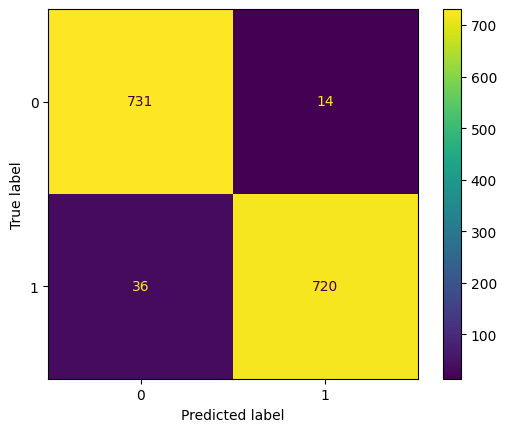

Model is  BernoulliNB()
****************************************************************************************************
Accuracy is 0.966022651565623
****************************************************************************************************
Classification report               precision    recall  f1-score   support

      Female       0.97      0.96      0.97       745
        Male       0.96      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

****************************************************************************************************
[[717  28]
 [ 23 733]]


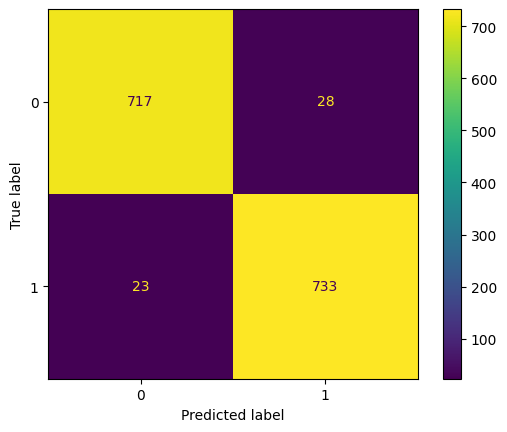

Model is  SVC()
****************************************************************************************************
Accuracy is 0.972018654230513
****************************************************************************************************
Classification report               precision    recall  f1-score   support

      Female       0.96      0.98      0.97       745
        Male       0.98      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

****************************************************************************************************
[[733  12]
 [ 30 726]]


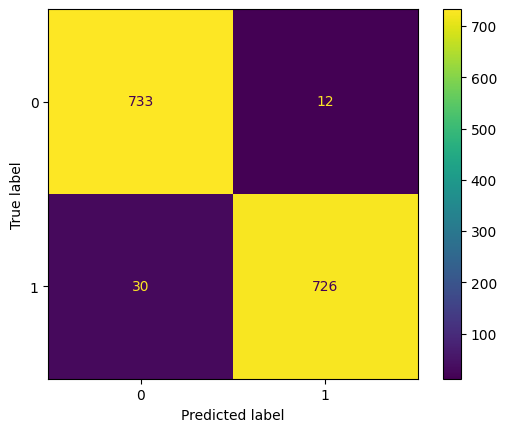

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
for i in lst:
    print("Model is ",i)
    print("*"*100)
    i.fit(x_train,y_train)
    y_pred=i.predict(xtest)
    print("Accuracy is",accuracy_score(ytest,y_pred))
    print("*"*100)
    print("Classification report",classification_report(ytest,y_pred))
    print("*"*100)
    cm=confusion_matrix(ytest,y_pred)
    cmd=ConfusionMatrixDisplay(cm)
    print(cm)
    cmd.plot()
    plt.show()